In [3]:
import time
import random

from grid import GridWorld
from algorithm import MDP,QLearning  

In [4]:
def solve_grid_problem(width: int, height: int, num_obstacles: int, algorithm_class=MDP, env = None):
    """Solve grid problem using specified algorithm"""
    if not env:
        obstacles = []
        available_positions = [(x, y) for x in range(width) for y in range(height)]
        
        for _ in range(num_obstacles):
            if available_positions:
                pos = random.choice(available_positions)
                obstacles.append(pos)
                available_positions.remove(pos)
        
        env = GridWorld(width, height, obstacles)
    
    algorithm = algorithm_class(env)
    path, policy = algorithm.solve()
    
    print("Grid with optimal path:")
    env.plot_grid(path, policy)
    
    if isinstance(algorithm, MDP):
        algorithm.plot_value_function()
    
    return env, algorithm, path, policy

In [7]:
def compare_algorithms(width: int, height: int, num_obstacles: int):
    start_time = time.time()
    env, value_iteration, value_iteration_path, value_iteration_policy = solve_grid_problem(width, height, num_obstacles, MDP)
    value_iteration_time = time.time() - start_time

    start_time = time.time()
    _, q_learning, q_learning_path, q_learning_policy = solve_grid_problem(width, height, num_obstacles, QLearning, env)
    q_learning_time = time.time() - start_time

    # Print results
    print("Value Iteration:")
    print(f"Path Length: {len(value_iteration_path)}")
    print(f"Time: {value_iteration_time:.2f} seconds")

    print("\nQ-Learning:")
    print(f"Path Length: {len(q_learning_path)}")
    print(f"Time: {q_learning_time:.2f} seconds")

    # Plot the results
    # env.plot_grid(value_iteration_path, value_iteration_policy)
    # value_iteration.plot_value_function()
    # env.plot_grid(q_learning_path, q_learning_policy)

Grid with optimal path:


c:\Users\manav\OneDrive\Desktop\RL\grid.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\manav\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


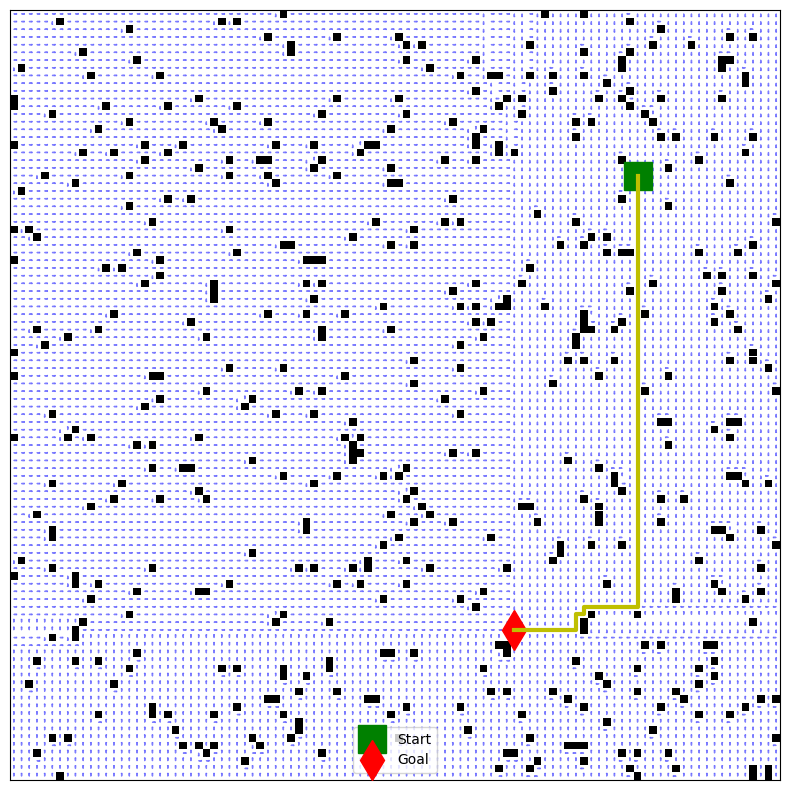

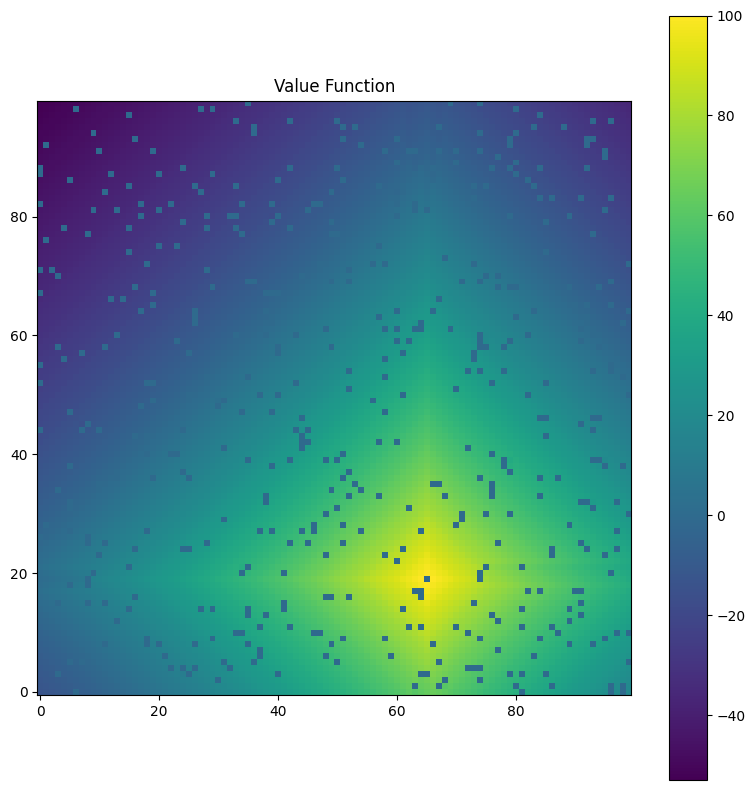

Grid with optimal path:


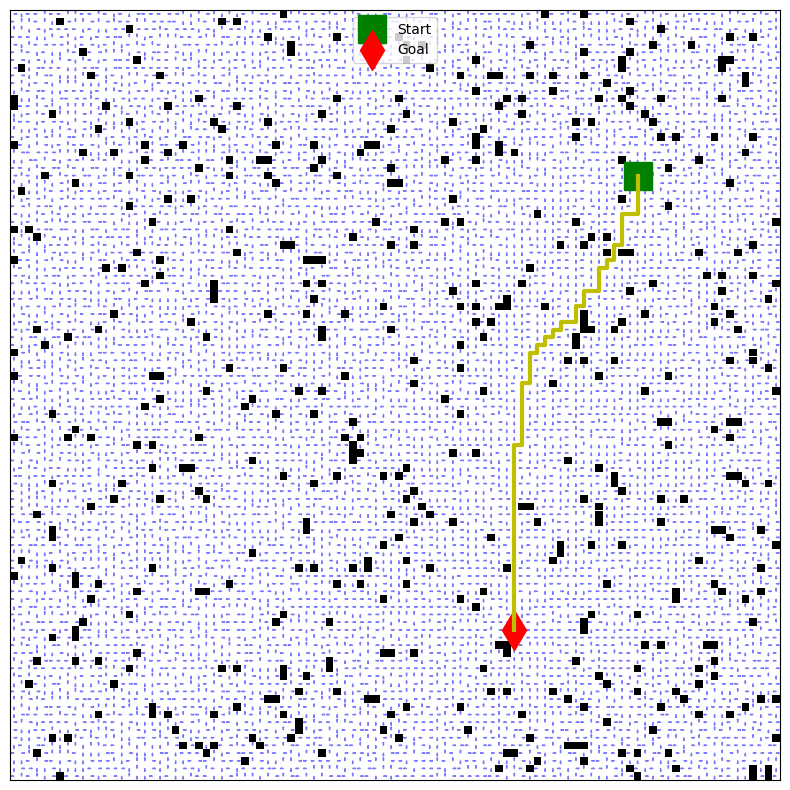

Value Iteration:
Path Length: 76
Time: 89.48 seconds

Q-Learning:
Path Length: 76
Time: 76.00 seconds


In [8]:
compare_algorithms(100,100,500)